ANIME HANDS ON

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
anime = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Data-Science-Program/DATASETS/anime.csv")

In [4]:
anime.head

<bound method NDFrame.head of       anime_id                                              title  \
0        11013                                      Inu x Boku SS   
1         2104                                   Seto no Hanayome   
2         5262                                 Shugo Chara!! Doki   
3          721                                      Princess Tutu   
4        12365                                Bakuman. 3rd Season   
...        ...                                                ...   
6663     37405                            Dokidoki Little Ooyasan   
6664     37886                        Wo Shi Jiang Xiaobai (2018)   
6665     37255              Genki Genki Non-tan: Obake Mura Meiro   
6666     35229                                Mr. Men Little Miss   
6667     36315  Mushi Mushi Mura no Nakama-tachi: Minna Ii Tok...   

                  title_english                      title_japanese  \
0     Inu X Boku Secret Service                              妖狐×僕SS   


Is a Rating Score of 6.2 Different from the Mean in this Dataset?

<Axes: >

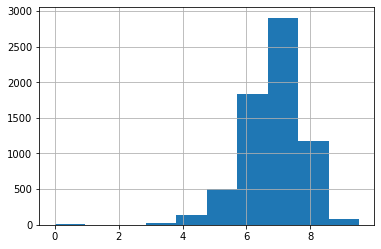

In [5]:
anime.score.hist()

In [6]:
anime.score.mean()

6.848998200359928

Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?

In [7]:
anime.status.unique()

array(['Finished Airing', 'Currently Airing'], dtype=object)

<Axes: >

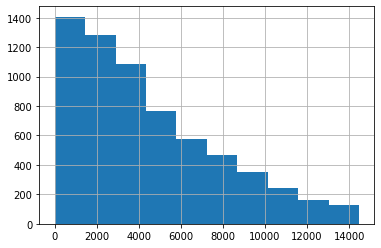

In [8]:
anime.popularity[anime.status == 'Finished Airing'].hist()

popularity drops after an anime has finished producing episodes

whats popular now?

<Axes: >

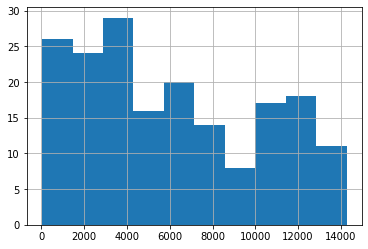

In [9]:
anime.popularity[anime.status == 'Currently Airing'].hist()

popularity is up and down during an anime's original air

run an independent t-test

In [10]:
ttest_ind(anime.popularity[anime.status == 'Currently Airing'], anime.popularity[anime.status == 'Finished Airing'])

Ttest_indResult(statistic=6.489071311277514, pvalue=9.256789141747446e-11)

##there is a significant difference

The means

In [11]:
anime.popularity[anime.status == 'Currently Airing'].mean()

6108.131147540984

In [12]:
anime.popularity[anime.status == 'Finished Airing'].mean()

4433.558057054742

thats a steep jump obviously what is currently airring is what is most popular

Does the Source of the Anime Influence the Type of Anime?

In [13]:
anime.source.unique()

array(['Manga', 'Original', 'Light novel', '4-koma manga', 'Novel',
       'Visual novel', 'Other', 'Game', 'Picture book', 'Card game',
       'Web manga', 'Book', 'Music', 'Radio', 'Digital manga'],
      dtype=object)

In [22]:
cleanup = {'Manga' : 'Manga', 'Original' : 'Other', 'Light novel' : 'Book', '4-koma manga' : 'Manga', 'Novel' : 'Book', 'Visual novel' : 'Book', 'Other' : 'Other', 'Game' : 'Game',\n",'Picture book' : 'Novel', 'Card game' : 'Game', 'Web manga' : 'Manga', 'Book' : 'Book', 'Music' : 'Listening', 'Radio' : 'Listening', 'Digital manga' : 'Manga'}"

SyntaxError: unexpected character after line continuation character (826961802.py, line 1)

In [23]:
anime2 = anime.replace({'source': cleanup})

NameError: name 'cleanup' is not defined

In [24]:
anime2.source.unique()

NameError: name 'anime2' is not defined

In [25]:
crosstab = pd.crosstab(anime2['source'], anime['type'])
crosstab

NameError: name 'anime2' is not defined

In [26]:
stats.chi2_contingency(crosstab)

NameError: name 'crosstab' is not defined

How do the Variables about Popularity / Ranking Relate to Each Other?

In [27]:
anime3 = anime[['score', 'scored_by', 'rank', 'popularity', 'members', 'favorites']]

In [28]:
anime3.head

<bound method NDFrame.head of       score  scored_by     rank  popularity  members  favorites
0      7.63     139250   1274.0         231   283882       2809
1      7.89      91206    727.0         366   204003       2579
2      7.55      37129   1508.0        1173    70127        802
3      8.21      36501    307.0         916    93312       3344
4      8.67     107767     50.0         426   182765       2082
...     ...        ...      ...         ...      ...        ...
6663   9.52         33      NaN       10273      357         21
6664   0.00          0  12719.0       10168      384          1
6665   4.20          5  10253.0       14257       37          0
6666   4.57          7  11396.0       14066       49          1
6667   7.00          4  11396.0       14191       40          0

[6668 rows x 6 columns]>

corr matrix

In [29]:
anime3.corr(method='pearson')

,score,scored_by,rank,popularity,members,favorites
score,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094
scored_by,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949
rank,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503
popularity,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745
members,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565
favorites,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000


enhance interpretaion and visuals

In [31]:
anime3.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,score,scored_by,rank,popularity,members,favorites
score,1.0,0.38,-0.9,-0.69,0.42,0.26
scored_by,0.38,1.0,-0.36,-0.43,0.99,0.79
rank,-0.9,-0.36,1.0,0.78,-0.39,-0.21
popularity,-0.69,-0.43,0.78,1.0,-0.47,-0.21
members,0.42,0.99,-0.39,-0.47,1.0,0.78
favorites,0.26,0.79,-0.21,-0.21,0.78,1.0


In [ ]:
score .9
scored_by-.36
rank 1
popularity .78
members -.39
favorites -.2